In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import datasets
import numpy as np
import pandas as pd

train_set8 = pd.read_pickle("df_upsampled_train_features_8.pkl")

# Initializing Classifiers
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
clf4 = SVC()

# Loading some example data
train_x_set8 = train_set8.loc[:, ['tfidf_cosine', 'tfidf_bigram_cosine', 'tfidf_trigram_cosine', 'count_vec_cosine', 'lda_50topics_cosine', 'lda_100topics_cosine', 'lda_200topics_cosine']].values
train_y_set8 = train_set8['label'].values

In [2]:
test_x_set8 = pd.read_pickle("test_x_features8.pkl")
test_y_set8 = pd.read_pickle("test_y_features8.pkl")
test_x_set8_xgboost = test_x_set8.loc[:, ['tfidf_cosine', 'tfidf_bigram_cosine', 'tfidf_trigram_cosine', 'count_vec_cosine', 'lda_50topics_cosine', 'lda_100topics_cosine', 'lda_200topics_cosine']].values
test_y_set8_xgboost = test_y_set8['label'].values

In [3]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [4]:
clf1.fit(train_x_set8, train_y_set8)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [5]:
predictions1 = clf1.predict(test_x_set8)

In [6]:
print('Logistic Regression:')
print('Accuracy:', accuracy_score(test_y_set8, predictions1))
print('F1 score:', f1_score(test_y_set8, predictions1))
print('Recall:', recall_score(test_y_set8, predictions1))
print('Precision:', precision_score(test_y_set8, predictions1))

Logistic Regression:
Accuracy: 0.8151208276971448
F1 score: 0.03042116699686841
Recall: 0.7168674698795181
Precision: 0.01554031994776363


In [7]:
log_acc = accuracy_score(test_y_set8, predictions1)
log_f1 = f1_score(test_y_set8, predictions1)
log_recall = recall_score(test_y_set8, predictions1)
log_precision = precision_score(test_y_set8, predictions1)

In [8]:
clf2.fit(train_x_set8, train_y_set8)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [9]:
predictions2 = clf2.predict(test_x_set8)

In [10]:
print('Random Forest:')
print('Accuracy:', accuracy_score(test_y_set8, predictions2))
print('F1 score:', f1_score(test_y_set8, predictions2))
print('Recall:', recall_score(test_y_set8, predictions2))
print('Precision:', precision_score(test_y_set8, predictions2))

Random Forest:
Accuracy: 0.9929441011954813
F1 score: 0.11059907834101383
Recall: 0.10843373493975904
Precision: 0.11285266457680251


In [11]:
rf_acc = accuracy_score(test_y_set8, predictions2)
rf_f1 = f1_score(test_y_set8, predictions2)
rf_recall = recall_score(test_y_set8, predictions2)
rf_precision = precision_score(test_y_set8, predictions2)

In [12]:
clf3.fit(train_x_set8, train_y_set8) 

GaussianNB(priors=None)

In [13]:
predictions3 = clf3.predict(test_x_set8)

In [14]:
print('GaussianNB:')
print('Accuracy:', accuracy_score(test_y_set8, predictions3))
print('F1 score:', f1_score(test_y_set8, predictions3))
print('Recall:', recall_score(test_y_set8, predictions3))
print('Precision:', precision_score(test_y_set8, predictions3))

GaussianNB:
Accuracy: 0.8668153401820641
F1 score: 0.037346956751519424
Recall: 0.6385542168674698
Precision: 0.019236003992378188


In [15]:
nb_acc = accuracy_score(test_y_set8, predictions3)
nb_f1 = f1_score(test_y_set8, predictions3)
nb_recall = recall_score(test_y_set8, predictions3)
nb_precision = precision_score(test_y_set8, predictions3)

In [16]:
clf4.fit(train_x_set8, train_y_set8) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
predictions4 = clf4.predict(test_x_set8)

In [18]:
print('SVM:')
print('Accuracy:', accuracy_score(test_y_set8, predictions4))
print('F1 score:', f1_score(test_y_set8, predictions4))
print('Recall:', recall_score(test_y_set8, predictions4))
print('Precision:', precision_score(test_y_set8, predictions4))

SVM:
Accuracy: 0.827453417662901
F1 score: 0.03265696522511444
Recall: 0.7198795180722891
Precision: 0.01670744494931842


In [19]:
svm_acc = accuracy_score(test_y_set8, predictions4)
svm_f1 = f1_score(test_y_set8, predictions4)
svm_recall = recall_score(test_y_set8, predictions4)
svm_precision = precision_score(test_y_set8, predictions4)

In [20]:
from xgboost import XGBClassifier

In [21]:
# fit xgboost model no training data
model = XGBClassifier()
model.fit(train_x_set8, train_y_set8)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [22]:
predictions5 = model.predict(test_x_set8_xgboost)

C:\Users\skamuf\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [23]:
print('XGBoost:')
print('Accuracy:', accuracy_score(test_y_set8_xgboost, predictions5))
print('F1 score:', f1_score(test_y_set8_xgboost, predictions5))
print('Recall:', recall_score(test_y_set8_xgboost, predictions5))
print('Precision:', precision_score(test_y_set8_xgboost, predictions5))

XGBoost:
Accuracy: 0.8137193970192179
F1 score: 0.03044526195610808
Recall: 0.7228915662650602
Precision: 0.01555008422962291


In [24]:
xgboost_acc = accuracy_score(test_y_set8, predictions5)
xgboost_f1 = f1_score(test_y_set8, predictions5)
xgboost_recall = recall_score(test_y_set8, predictions5)
xgboost_precision = precision_score(test_y_set8, predictions5)

In [25]:
from sklearn.neural_network import MLPClassifier

In [26]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

In [27]:
mlp.fit(train_x_set8, train_y_set8)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [28]:
predictions6 = mlp.predict(test_x_set8_xgboost)

In [29]:
print('MLP - multi-layer perceptron:')
print('Accuracy:', accuracy_score(test_y_set8_xgboost, predictions6))
print('F1 score:', f1_score(test_y_set8_xgboost, predictions6))
print('Recall:', recall_score(test_y_set8_xgboost, predictions6))
print('Precision:', precision_score(test_y_set8_xgboost, predictions6))

MLP - multi-layer perceptron:
Accuracy: 0.7943796536638272
F1 score: 0.028780291256547515
Recall: 0.7530120481927711
Precision: 0.01467050055747902


In [30]:
mlp_acc = accuracy_score(test_y_set8, predictions6)
mlp_f1 = f1_score(test_y_set8, predictions6)
mlp_recall = recall_score(test_y_set8, predictions6)
mlp_precision = precision_score(test_y_set8, predictions6)

In [31]:
import matplotlib.pyplot as plt

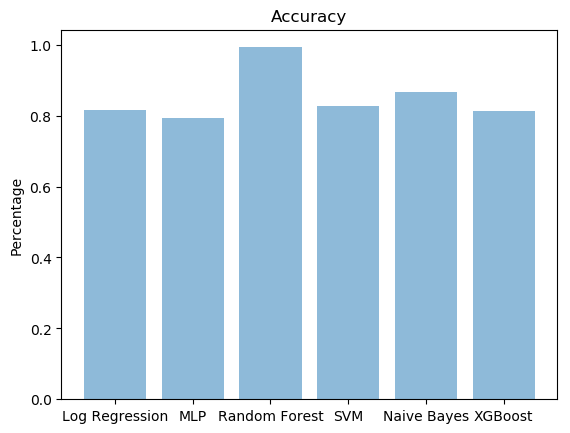

In [32]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('Log Regression', 'MLP', 'Random Forest', 'SVM', 'Naive Bayes', 'XGBoost')
y_pos = np.arange(len(objects))
performance = [log_acc, mlp_acc, rf_acc,svm_acc, nb_acc, xgboost_acc]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('Accuracy')
 
plt.show()

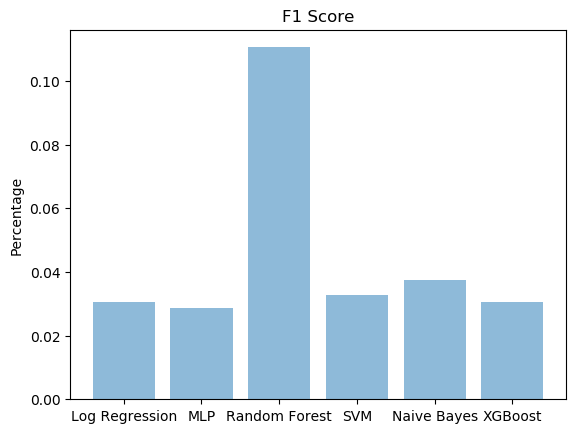

In [33]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('Log Regression', 'MLP', 'Random Forest', 'SVM', 'Naive Bayes', 'XGBoost')
y_pos = np.arange(len(objects))
performance = [log_f1, mlp_f1, rf_f1, svm_f1, nb_f1, xgboost_f1]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('F1 Score')
 
plt.show()

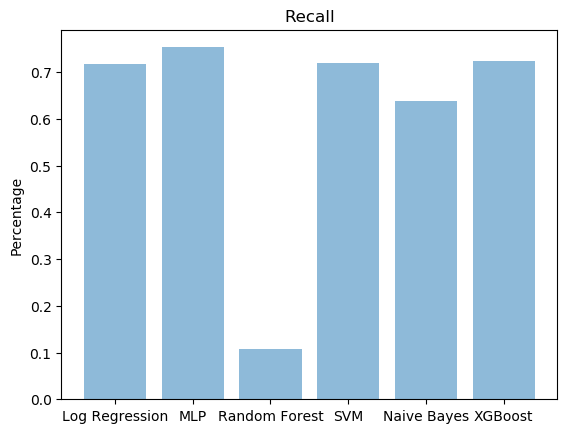

In [34]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('Log Regression', 'MLP', 'Random Forest', 'SVM', 'Naive Bayes', 'XGBoost')
y_pos = np.arange(len(objects))
performance = [log_recall, mlp_recall, rf_recall, svm_recall, nb_recall, xgboost_recall]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('Recall')
 
plt.show()

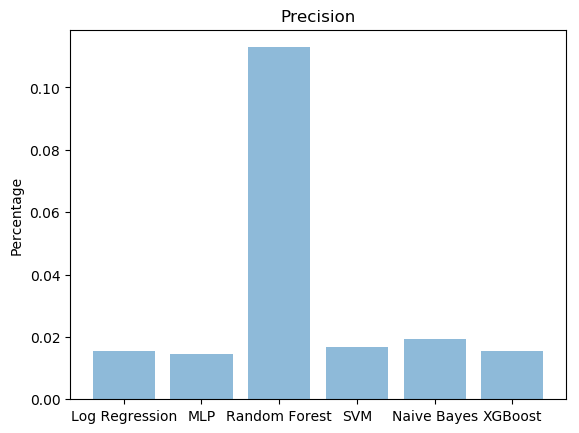

In [35]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('Log Regression', 'MLP', 'Random Forest', 'SVM', 'Naive Bayes', 'XGBoost')
y_pos = np.arange(len(objects))
performance = [log_precision, mlp_precision, rf_precision, svm_precision, nb_precision, xgboost_precision]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('Precision')
 
plt.show()